<a href="https://colab.research.google.com/github/Keshu321/AI_Midterm_12194874/blob/main/Week7_lab(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 7 Lab 1-2**

### Request package was installed with the command below

In [7]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Request package was later import to the workingspace and the python file downloaded through the provided link

In [ ]:
import requests
url='https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r=requests.get(url)

with open('utilities.py', 'w') as f:
  f.write(r.text)

**Week 7 Lab 1-3**

### In the following labraries like numpy, torch and many others were imported so that all possible commands run easily.

### Also **train_model** was imported as well from the python file we downloaded above

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
from utilities import train_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 128
BATCH_SIZE=32

transform=transforms.Compose([transforms.ToTensor()])
trainset=CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
trainloader=DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data=next(iter(trainloader))
mean=data[0].mean()
stddev=data[0].std()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./pt_data/cifar-10-python.tar.gz to ./pt_data


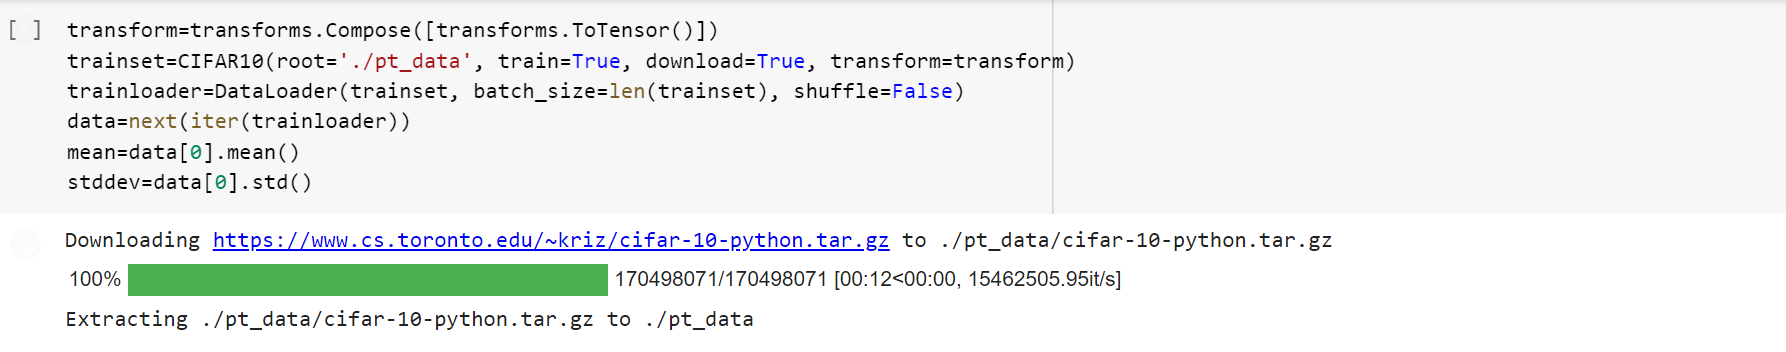

**Week 7 Lab 1-4**

### After running all codes, the very last step was to load and standardize training as well as test datasets.

In [ ]:
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean, stddev)])

trainset=CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
testset=CIFAR10(root='./pt_data', train=False, download=True, transform=transform)

model=nn.Sequential(
    nn.Conv2d(3, 64, 5, stride=2, padding=2),
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(64*8*8, 10)
)

Files already downloaded and verified
Files already downloaded and verified


**Week 7 Lab 1-5**

In [8]:
layers=next(model.modules())
conv_layer0=layers[0]
conv_layer1=layers[2]
output_layer=layers[5]

nn.init.kaiming_normal_(conv_layer0.weight)
nn.init.constant_(conv_layer0.bias, 0.0)
nn.init.kaiming_normal_(conv_layer1.weight)
nn.init.constant_(conv_layer1.bias, 0.0)

nn.init.xavier_uniform_(output_layer.weight)
nn.init.constant_(output_layer.bias, 0.0)

optimizer=torch.optim.Adam(model.parameters())
loss_function=nn.CrossEntropyLoss()

train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

Epoch 1/128 loss: 1.3815 - acc: 0.5141 - val_loss: 1.1725 - val_acc: 0.5921
Epoch 2/128 loss: 1.0487 - acc: 0.6370 - val_loss: 1.1502 - val_acc: 0.6051
Epoch 3/128 loss: 0.9171 - acc: 0.6806 - val_loss: 1.0801 - val_acc: 0.6284
Epoch 4/128 loss: 0.8245 - acc: 0.7131 - val_loss: 1.0315 - val_acc: 0.6490
Epoch 5/128 loss: 0.7500 - acc: 0.7403 - val_loss: 1.0518 - val_acc: 0.6547
Epoch 6/128 loss: 0.6779 - acc: 0.7632 - val_loss: 1.1368 - val_acc: 0.6385
Epoch 7/128 loss: 0.6185 - acc: 0.7812 - val_loss: 1.1570 - val_acc: 0.6425
Epoch 8/128 loss: 0.5653 - acc: 0.8013 - val_loss: 1.2110 - val_acc: 0.6388
Epoch 9/128 loss: 0.5139 - acc: 0.8198 - val_loss: 1.2628 - val_acc: 0.6370
Epoch 10/128 loss: 0.4697 - acc: 0.8343 - val_loss: 1.3479 - val_acc: 0.6364
Epoch 11/128 loss: 0.4259 - acc: 0.8486 - val_loss: 1.4270 - val_acc: 0.6264
Epoch 12/128 loss: 0.3967 - acc: 0.8599 - val_loss: 1.5245 - val_acc: 0.6319
Epoch 13/128 loss: 0.3644 - acc: 0.8688 - val_loss: 1.6300 - val_acc: 0.6301
Epoch 14

[0.9755078374920025, 0.6060303514376997]